# Cryptocurrency Market Analysis  

**This page contains the code and output used to analyse the current cryptocurrency market. It also contains machine learning models used to help predict future crypto currency prices. An in-depth study of the theory behind the analysis and models will be available in the Project Report.**

**Required packages imported below**

In [2]:
import squarify
import sklearn
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as g_obj

**Read in the Crypto Market dataset generated from an R scrape of Cryptocurrency market data website**

In [4]:
df = pd.read_csv('C:/Users/Robot/PycharmProjects/Project5/crypto_market_data.csv', index_col = False)

**The command below shows the dataframe information such as column name, amount of rows, and datatype**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747558 entries, 0 to 747557
Data columns (total 14 columns):
Unnamed: 0     747558 non-null int64
slug           747558 non-null object
symbol         747558 non-null object
name           747558 non-null object
date           747558 non-null object
ranknow        747558 non-null int64
open           747558 non-null float64
high           747558 non-null float64
low            747558 non-null float64
close          747558 non-null float64
volume         747558 non-null int64
market         747558 non-null int64
close_ratio    747558 non-null float64
spread         747558 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 79.8+ MB


**Below, I'll start doing some Data Cleaning by removing the unwanted 'symbol' observation**

In [8]:
df = df.drop('symbol', axis=1)

**Next, I'll do some Exploratory Analysis on the dataset with the head() and tail() commands**

In [10]:
df.head()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,68495,bitcoin,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,68494,bitcoin,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,68493,bitcoin,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,68492,bitcoin,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,68491,bitcoin,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [11]:
df.tail()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
747553,664046,timescoin,TimesCoin,2018-03-29,1563,0.754418,0.755656,0.632053,0.660433,49939,0,0.2296,0.12
747554,664045,timescoin,TimesCoin,2018-03-30,1563,0.658791,0.668900,0.599187,0.656268,17337,0,0.8188,0.07
747555,664044,timescoin,TimesCoin,2018-03-31,1563,0.656368,0.690921,0.654447,0.665280,260,0,0.2970,0.04
747556,664043,timescoin,TimesCoin,2018-04-01,1563,0.665260,0.674758,0.619034,0.652009,171,0,0.5918,0.06
747557,664042,timescoin,TimesCoin,2018-04-02,1563,0.655216,0.655216,0.650958,0.650958,171,0,0.0000,0.00


**I decided to do some more Data Cleaning below. The dataframe contains over 1,500 different cryptocurrencies. To limit the dataframe to the top 10, I used the command below**

In [13]:
df = df[df.ranknow <= 10]

**Next, I converted the 'date' values into a format which will allow easier data manipulation**

In [15]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

**Let's observe how many rows of observable data remain**

In [17]:
len(df)

9251

**9,251 rows, this will do nicely.  
Let's take another look at the dataframe**

In [19]:
df.head()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,68495,bitcoin,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,68494,bitcoin,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,68493,bitcoin,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,68492,bitcoin,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,68491,bitcoin,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [20]:
df.tail()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
9246,366614,iota,IOTA,2018-04-04,10,1.110000,1.110000,0.970967,0.990158,20877700,3079660000,0.1380,0.14
9247,366613,iota,IOTA,2018-04-05,10,0.990249,0.990948,0.941145,0.982953,19414000,2752430000,0.8395,0.05
9248,366612,iota,IOTA,2018-04-06,10,0.979734,0.995309,0.929204,0.935367,13385200,2723200000,0.0932,0.07
9249,366611,iota,IOTA,2018-04-07,10,0.935452,1.010000,0.934562,0.984719,13535500,2600120000,0.6649,0.08
9250,366610,iota,IOTA,2018-04-08,10,0.981009,1.050000,0.981009,1.020000,23121200,2726750000,0.5652,0.07


**The names for each of the top 10 cryptocurrencies is observed by using the command below**

In [22]:
df.name.unique()

array(['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin', 'EOS',
       'Cardano', 'Stellar', 'NEO', 'IOTA'], dtype=object)

**Next, I'll do some Feature Engineering.   
I calculated the HLC (High-Low-Close) and OHLC (Open-High-Low-Close) values for the dataframe.  
These new values were added as columns.**

In [24]:
df['hlc_average'] = (df['high'] + df['low'] + df['close']) / 3
df['ohlc_average'] = (df['open'] + df['high'] + df['low'] + df['close']) / 4

**Let's observe these new values in the dataframe**

In [26]:
df.head()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,hlc_average,ohlc_average
0,68495,bitcoin,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88,134.096667,134.3975
1,68494,bitcoin,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49,142.010000,140.1175
2,68493,bitcoin,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88,139.993333,140.9950
3,68492,bitcoin,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17,121.533333,125.9000
4,68491,bitcoin,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32,107.696667,109.8675


**Next, I'll create a dataframe containing just the values for the current date.  
This will be used to create a Treemap of the current Cryptocurrency Market Cap of the top 10 cryptocurrencies.**

In [28]:
df1 = df.loc[df['date'] == '2018-04-08']

**Let's take a look at the new dataframe**

In [30]:
df1.head()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,hlc_average,ohlc_average
1806,66689,bitcoin,Bitcoin,2018-04-08,1,6919.980000,7111.560000,6919.980000,7023.520000,3652500000,117392000000,0.5405,191.58,7018.353333,6993.760000
2782,251803,ethereum,Ethereum,2018-04-08,2,385.740000,402.590000,385.600000,400.510000,948488000,38065400000,0.8776,16.99,396.233333,393.610000
4491,566758,ripple,Ripple,2018-04-08,3,0.488227,0.501418,0.487591,0.500398,137548000,19087000000,0.9262,0.01,0.496469,0.494409
4751,69252,bitcoin-cash,Bitcoin Cash,2018-04-08,4,640.890000,659.810000,640.890000,655.260000,198906000,10934300000,0.7595,18.92,651.986667,649.212500
6558,397905,litecoin,Litecoin,2018-04-08,5,116.290000,118.550000,115.950000,117.670000,194664000,6510420000,0.6615,2.60,117.390000,117.115000


**Further Data Cleaning is completed so that only the pertinent data remains for the treemap**

In [32]:
df2 = df1.filter(['name','market'], axis=1)

**A look at the new dataframe**

In [34]:
df2.head()

,name,market
1806,Bitcoin,117392000000
2782,Ethereum,38065400000
4491,Ripple,19087000000
4751,Bitcoin Cash,10934300000
6558,Litecoin,6510420000


**In the command below, I format the numerical data so that it will be printed as USD currency.  
I also added a newline character so that the name and currency will display in a more readable format on the graph.  
These were combined into a new column.**

In [36]:
df2["Label"] = df2["name"] + " \n $" + df2["market"].map('{:,}'.format).astype("str")

**Let's look at the new column**

In [38]:
df2.head()

,name,market,Label
1806,Bitcoin,117392000000,"Bitcoin \n $117,392,000,000"
2782,Ethereum,38065400000,"Ethereum \n $38,065,400,000"
4491,Ripple,19087000000,"Ripple \n $19,087,000,000"
4751,Bitcoin Cash,10934300000,"Bitcoin Cash \n $10,934,300,000"
6558,Litecoin,6510420000,"Litecoin \n $6,510,420,000"


**The newline character is showing up as \n in the data but this is inconsequential as it will behave as intended in the graph.**

**The graph of the Cryptocurrency Market Cap is generated from the code below.**

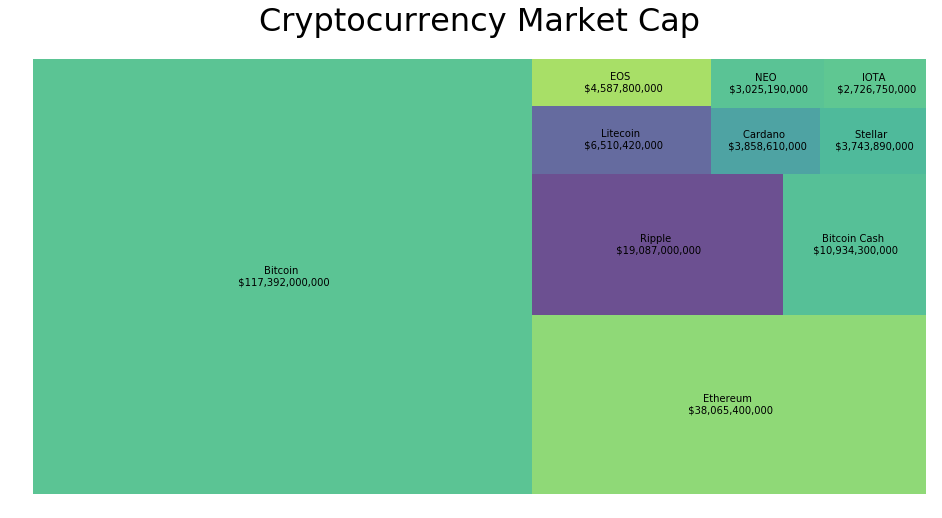

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
squarify.plot(sizes=df2['market'], label=df2['Label'], alpha=.8 )
plt.axis('off')
plt.rc('font', size=10)  
plt.title("Cryptocurrency Market Cap", fontsize=32, color="Black")
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.show()

**The graph above shows just how much of a grasp Bitcoin currently has on the Cryptocurrency Market.   
It has a greater market share than the next top 9 cryptocurrencies combined.**

**To see how active the Cryptocurrency Market has been over the last few years, I'll group the data by date.**

In [49]:
date_group = df.groupby('date', as_index=False).sum()

**Let's take a look at this data**

In [51]:
date_group.head()

,date,Unnamed: 0,ranknow,open,high,low,close,volume,market,close_ratio,spread,hlc_average,ohlc_average
0,2013-04-28,468206,6,139.60,140.38,136.28,138.56,0,1574293400,1.3165,4.10,138.406667,138.7050
1,2013-04-29,468204,6,138.81,152.06,138.23,148.92,0,1566112700,1.2225,13.83,146.403333,144.5050
2,2013-04-30,468202,6,148.40,151.50,138.22,143.30,0,1673506800,0.7093,13.28,144.340000,145.3550
3,2013-05-01,468200,6,143.29,144.25,111.24,120.79,0,1616721200,0.6215,33.01,125.426667,129.8925
4,2013-05-02,468198,6,120.16,129.64,95.29,108.58,0,1357432700,0.7376,34.35,111.170000,113.4175


**This data will be much more easily viewed via the average price and trading volume graph generated from the code below**

In [53]:
t0 = g_obj.Scatter(x=groupby['date'], y=groupby['hlc_average'],name='HLC Average')

t1 = g_obj.Scatter(x=groupby['date'], y=groupby['volume'],name='Volume', yaxis='y2')

data = [t0, t1]
layout = g_obj.Layout(title='General Overview',
    yaxis={'title': 'USD','nticks': 10,},
    yaxis2={'title': 'Transactions','nticks': 5,'showgrid': False,'overlaying': 'y','side': 'right'})
fig = g_obj.Figure(data=data, layout=layout)
py.iplot(fig, filename='time-series-overview')

NameError: name 'groupby' is not defined

**The code above previously produced a graph but has recently started producing the error: 'NameError: name 'groupby' is not defined'  
I have embedded an image of the expected output below**

![8BZBkc.png](https://i.lensdump.com/i/8BZBkc.png)

**As can be seen in the graph above, the bulk of the cryptocurrency market activity started to spike in 2017.  
Further Data Cleaning needs to be done to exlude pre 2017 values.  
This is important because excluding this data will lead to more accurate prediction models.  
The Data Cleaning is achieved via the command below.**

In [60]:
df = df[df['date'] >= dt.date(2017, 1, 1)]

**Next, we'll start creating some coin specific dataframes so that we can observe their individual price histories via graphs.**

**The Bitcoin dataframe with Data Cleaning.**

In [63]:
btc=df[df['name']=='Bitcoin']
btc1 = btc.filter(['open','high','low','close'], axis=1)

**Let's take a look at the amount of rows and columns**

In [65]:
btc1.shape

(463, 4)

**Next, I index the data by date**

In [67]:
btc1.index = btc['date']

**Let's see if the Bitcoin dataframe now contains only the pertinent data**

In [69]:
btc1.head()

,open,high,low,close
date,,,,
2017-01-01,963.66,1003.08,958.70,998.33
2017-01-02,998.62,1031.39,996.70,1021.75
2017-01-03,1021.60,1044.08,1021.60,1043.84
2017-01-04,1044.40,1159.42,1044.40,1154.73
2017-01-05,1156.73,1191.10,910.42,1013.38


**It's ready to be graphed. Let's use the seaborn package to visualise its price history**

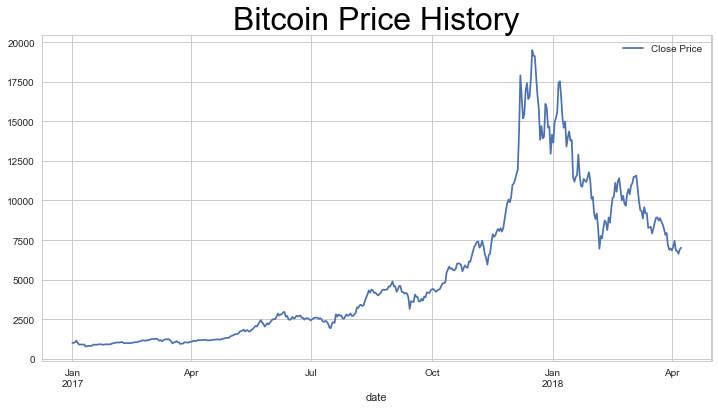

In [71]:
sns.set()
sns.set_style('whitegrid')
btc1['close'].plot(figsize=(12,6),label='Close Price')
plt.title("Bitcoin Price History", fontsize=32, color="Black")
plt.legend()

**As can be seen above, Bitcoin has taken a tumble from its high of near \$20,000 to approximately \$6,500**

**Next, the Ethereum dataframe is created with Data Cleaning and date indexing**

In [74]:
eth=df[df['name']=='Ethereum']
eth1 = eth.filter(['open','high','low','close'], axis=1)
eth1.index = eth['date']

**Let's graph the Ethereum Price History**

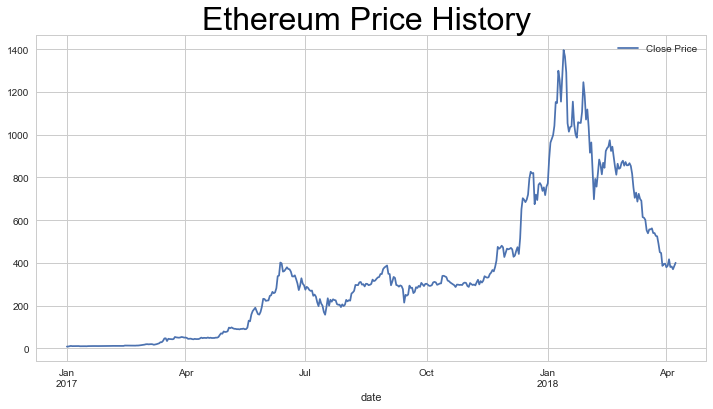

In [76]:
sns.set()
sns.set_style('whitegrid')
eth1['close'].plot(figsize=(12,6),label='Close Price')
plt.title("Ethereum Price History ", fontsize=32, color="Black")
plt.legend()

**Ethereum has taken a tumble from a \$1,400 high to \$400**

**Next, the Ripple dataframe is created with Data Cleaning and date indexing**

In [79]:
xrp=df[df['name']=='Ripple']
xrp1 = xrp.filter(['open','high','low','close'], axis=1)
xrp1.index = xrp['date']

**Let's graph the Ripple Price History**

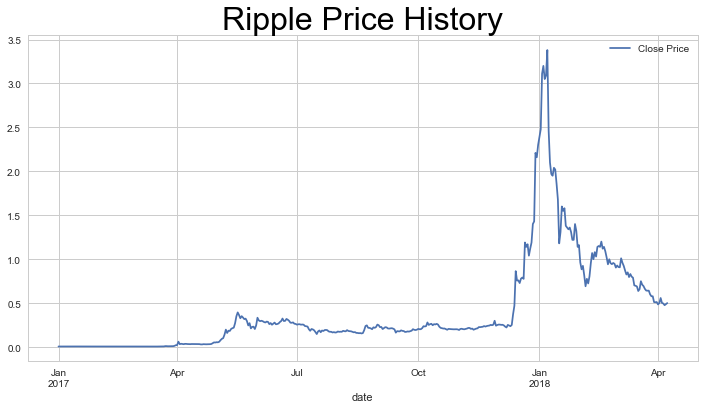

In [81]:
sns.set()
sns.set_style('whitegrid')
xrp1['close'].plot(figsize=(12,6),label='Close Price')
plt.title("Ripple Price History", fontsize=32, color="Black")
plt.legend()

**Like the other currencies, Ripple has also tumbled**

**Next, the Bitcoin Cash dataframe is created with Data Cleaning and date indexing**

In [84]:
bch=df[df['name']=='Bitcoin Cash']
bch1 = bch.filter(['open','high','low','close'], axis=1)
bch1.index = bch['date']

**Let's graph the Bitcoin Cash Price History**

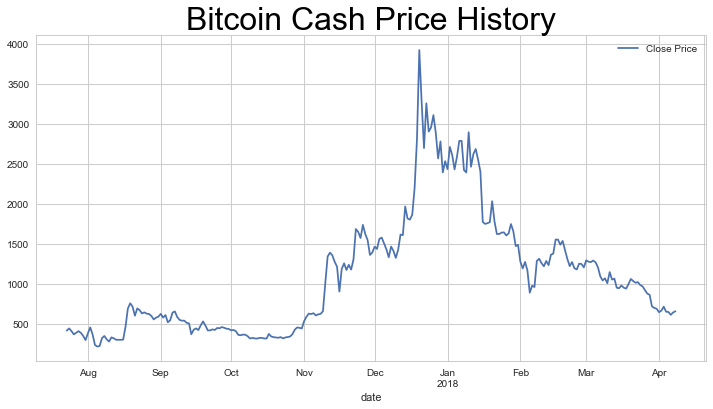

In [86]:
sns.set()
sns.set_style('whitegrid')
bch1['close'].plot(figsize=(12,6),label='Close Price')
plt.title("Bitcoin Cash Price History", fontsize=32, color="Black")
plt.legend()

**Bitcoin Cash has also been highly volatile and recently tumbled**

**Finally, the Litecoin dataframe is created with Data Cleaning and date indexing**

In [89]:
ltc=df[df['name']=='Litecoin']
ltc1 = ltc.filter(['open','high','low','close'], axis=1)
ltc1.index = ltc['date']

**Let's graph the Litecoin Cash Price History**

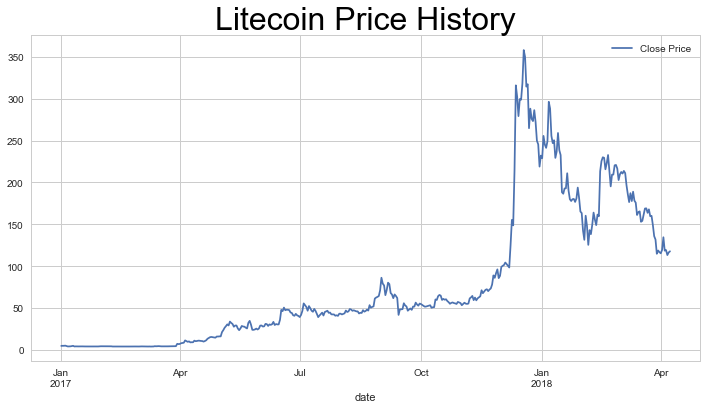

In [91]:
sns.set()
sns.set_style('whitegrid')
ltc1['close'].plot(figsize=(12,6),label='Close Price')
plt.title("Litecoin Price History", fontsize=32, color="Black")
plt.legend()

**Like the others, Litecoin has also tumbled but seems to have a little better retention of its value**

**Next, we'll start looking at Machine Learning Models.
 The dataframe is primarily numeric and we'll be trying to make some predictions.
 Regression Models are needed rather than classification models.
 We'll use the follwing Regression models:  **

 * Lasso  
 * Ridge  
 * Elastic Net  
 * Random Forests  
 * Gradient Boosting

**Let's import the pertinent models**

In [97]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import the trainer
from sklearn.model_selection import train_test_split

**We'll have a look at the rows and columns of the dataframe**

In [99]:
print(df.shape)

(3810, 15)


**Now, the Bitcoin dataframe**

In [101]:
print(btc.shape)

(463, 15)


**A closer look**

In [103]:
btc.tail()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,hlc_average,ohlc_average
1802,66693,bitcoin,Bitcoin,2018-04-04,1,7456.41,7469.88,6803.88,6853.84,4936000000,126434000000,0.0750,666.00,7042.533333,7146.0025
1803,66692,bitcoin,Bitcoin,2018-04-05,1,6848.65,6933.82,6644.80,6811.47,5639320000,116142000000,0.5767,289.02,6796.696667,6809.6850
1804,66691,bitcoin,Bitcoin,2018-04-06,1,6815.96,6857.49,6575.00,6636.32,3766810000,115601000000,0.2171,282.49,6689.603333,6721.1925
1805,66690,bitcoin,Bitcoin,2018-04-07,1,6630.51,7050.54,6630.51,6911.09,3976610000,112467000000,0.6680,420.03,6864.046667,6805.6625
1806,66689,bitcoin,Bitcoin,2018-04-08,1,6919.98,7111.56,6919.98,7023.52,3652500000,117392000000,0.5405,191.58,7018.353333,6993.7600


**Let's do some Data Cleaning**

In [105]:
btc.drop(['slug','name','date'], axis=1, inplace=True)

C:\Users\Robot\Anaconda2\envs\Project\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



**How does the dataframe look now**

In [107]:
btc.tail()

,Unnamed: 0,ranknow,open,high,low,close,volume,market,close_ratio,spread,hlc_average,ohlc_average
1802,66693,1,7456.41,7469.88,6803.88,6853.84,4936000000,126434000000,0.0750,666.00,7042.533333,7146.0025
1803,66692,1,6848.65,6933.82,6644.80,6811.47,5639320000,116142000000,0.5767,289.02,6796.696667,6809.6850
1804,66691,1,6815.96,6857.49,6575.00,6636.32,3766810000,115601000000,0.2171,282.49,6689.603333,6721.1925
1805,66690,1,6630.51,7050.54,6630.51,6911.09,3976610000,112467000000,0.6680,420.03,6864.046667,6805.6625
1806,66689,1,6919.98,7111.56,6919.98,7023.52,3652500000,117392000000,0.5405,191.58,7018.353333,6993.7600


**Here, we create a target variable object**

In [109]:
B = btc.close

**Next, we'll create an input features variable**

In [111]:
A = btc.drop('close', axis=1)

**Now, we create train and test sets. We'll set the test set to 20% of the observations**

In [113]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=100)

**Let's have a look at the subset sizes**

In [115]:
print( len(A_train), len(A_test), len(B_train), len(B_test) )

370 93 370 93


**Here's a summary look at the training data**

In [117]:
A_train.describe()

,Unnamed: 0,ranknow,open,high,low,volume,market,close_ratio,spread,hlc_average,ohlc_average
count,370.000000,370.0,370.000000,370.000000,370.000000,3.700000e+02,3.700000e+02,370.000000,370.000000,370.000000,370.000000
mean,66920.132432,1.0,5376.925027,5604.043595,5128.749784,3.835050e+09,8.977475e+10,0.581219,475.293811,5376.172450,5376.360595
std,131.853685,0.0,4651.284585,4888.128977,4362.489824,4.851799e+09,7.838214e+10,0.299327,653.609660,4634.410982,4635.780100
min,66689.000000,1.0,775.180000,823.310000,755.760000,6.753000e+07,1.247760e+10,0.001400,3.580000,795.613333,790.505000
25%,66807.250000,1.0,1318.772500,1335.437500,1298.007500,5.798372e+08,2.149410e+10,0.318675,84.172500,1319.259167,1319.137500
50%,66921.000000,1.0,3738.865000,3935.260000,3613.665000,1.658230e+09,6.200770e+10,0.605250,216.675000,3768.236667,3770.190000
75%,67033.500000,1.0,8232.717500,8504.647500,7893.365000,5.604415e+09,1.385972e+11,0.851950,596.315000,8184.883333,8190.741250
max,67151.000000,1.0,19475.800000,20089.000000,18974.100000,2.384090e+10,3.261410e+11,1.000000,4110.400000,19401.300000,19419.925000


**Next, we'll manually standardise the training data**

In [119]:
A_train_new = (A_train - A_train.mean()) / A_train.std()

**Here's a look at the standardised data**

In [121]:
A_train_new.describe()

,Unnamed: 0,ranknow,open,high,low,volume,market,close_ratio,spread,hlc_average,ohlc_average
count,3.700000e+02,0.0,3.700000e+02,3.700000e+02,3.700000e+02,3.700000e+02,3.700000e+02,3.700000e+02,3.700000e+02,3.700000e+02,3.700000e+02
mean,-4.056635e-14,NaN,-3.153634e-16,3.771758e-16,-1.665335e-16,-3.780759e-17,-9.962001e-17,-5.257056e-16,-3.090621e-17,4.575919e-16,2.052412e-16
std,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.752946e+00,NaN,-9.893493e-01,-9.780293e-01,-1.002407e+00,-7.765203e-01,-9.861577e-01,-1.937071e+00,-7.217057e-01,-9.883800e-01,-9.892306e-01
25%,-8.561189e-01,NaN,-8.724799e-01,-8.732597e-01,-8.781092e-01,-6.709291e-01,-8.711251e-01,-8.771118e-01,-5.984020e-01,-8.753892e-01,-8.751975e-01
50%,6.579775e-03,NaN,-3.521737e-01,-3.413952e-01,-3.472982e-01,-4.486625e-01,-3.542523e-01,8.028449e-02,-3.956778e-01,-3.469558e-01,-3.464726e-01
75%,8.597982e-01,NaN,6.139793e-01,5.933976e-01,6.337242e-01,3.646822e-01,6.228779e-01,9.044655e-01,1.851582e-01,6.060556e-01,6.070997e-01
max,1.750938e+00,NaN,3.031179e+00,2.963293e+00,3.173727e+00,4.123388e+00,3.015563e+00,1.399074e+00,5.561586e+00,3.026302e+00,3.029385e+00


**Instead of performing manual standardisation, we'll use model pipelines with preprocessing steps**

In [123]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

**For standardization, we'll use the StandardScaler**

In [125]:
from sklearn.preprocessing import StandardScaler

**Below, we create a pipelines dictionary**

In [127]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=100)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=100)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=100)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=100)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=100))
}

**Let's check that we have all 5 pipelines**

In [129]:
for key, value in pipelines.items(): print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


**What are the tunable hyperparameters of the Lasso pipeline?**

In [282]:
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=100,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 100,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False))]}

**It's time to start adjusting the hyperparamers of each pipeline**

**Lasso**

In [134]:
lasso_hyperparameters = {'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

**Ridge**

In [136]:
ridge_hyperparameters = {'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

**Elastic Net**

In [138]:
enet_hyperparameters = {'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                        'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}

**Random Forest**

In [140]:
rf_hyperparameters = {'randomforestregressor__n_estimators' : [100, 200],
                      'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],}

**Gradient Boosted**

In [142]:
gb_hyperparameters = {'gradientboostingregressor__n_estimators': [100, 200],
                      'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
                      'gradientboostingregressor__max_depth': [1, 3, 5]}

**A hyperparameters dictionary is created to store the hyperparameters**

In [143]:
hyperparameters = {'lasso' : lasso_hyperparameters,
                   'ridge' : ridge_hyperparameters,
                   'enet' : enet_hyperparameters,
                   'rf' : rf_hyperparameters,
                   'gb' : gb_hyperparameters}

**Let's check that the hyperparameters have been set up properly**

In [145]:
for key in ['lasso', 'ridge', 'enet', 'rf', 'gb']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

lasso was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
enet was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.


**Now, we can tune our models with Cross-Validation**

In [147]:
from sklearn.model_selection import GridSearchCV

**Next, we'll create a dictionary of fitted models which have been tuned using cross-validation.  
A loop is used to cycle through the tuning of each model.**

In [149]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(A_train, B_train)

    fitted_models[name] = model
    
    # Check if the model has been fitted
    print(name, 'has been successfully fitted.')

C:\Users\Robot\Anaconda2\envs\Project\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



lasso has been successfully fitted.
ridge has been successfully fitted.


C:\Users\Robot\Anaconda2\envs\Project\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



enet has been successfully fitted.
rf has been successfully fitted.
gb has been successfully fitted.


**Let's check if all of the cross-validation objects are present**

In [151]:
for key, value in fitted_models.items(): print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


**Now, we'll perform a final check on the fitted models**

In [158]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(A_test)
        print(name, 'has been successfully fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been successfully fitted.
ridge has been successfully fitted.
enet has been successfully fitted.
rf has been successfully fitted.
gb has been successfully fitted.


**It's time to start evaluating our fitted models. Let's have a look at the $R^{2}$ score for each model. The closer to 1, the better the regression model fits.**

In [161]:
for name, model in fitted_models.items(): print( name, 'has an R^2 score of', model.best_score_ )

lasso has an R^2 score of 0.99949537501
ridge has an R^2 score of 0.999998849539
enet has an R^2 score of 0.999474800172
rf has an R^2 score of 0.997713656907
gb has an R^2 score of 0.998582564272


**As can be seen above, each model has been fitted very well with the $R^{2}$ score for Ridge model coming out on top.**

**Let's import the $R^{2}$ score, MAE (Mean Absolute Error), and MSE (Mean Squared Error) functions.**

In [162]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [165]:
# Next, we'll create a for loop to print each of the fitted models' performance on the test set and append the results in an account list.

In [164]:
account = list()
for name, model in fitted_models.items():
    pred = model.predict(A_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(B_test, pred ))
    print( 'MAE:', mean_absolute_error(B_test, pred))
    print( 'MSE:', mean_squared_error(B_test, pred))
    print()
    
    account.append({
        'MSE': mean_squared_error(B_test, pred),
        'MAE': mean_absolute_error(B_test, pred),
        'R^2': r2_score(B_test, pred),
        'name': name,
    })

lasso
--------
R^2: 0.999191219352
MAE: 65.0345286072
MSE: 13931.3416778

ridge
--------
R^2: 0.999998628651
MAE: 2.73341195547
MSE: 23.6216559031

enet
--------
R^2: 0.999170685794
MAE: 65.9327854989
MSE: 14285.0346166

rf
--------
R^2: 0.997988895469
MAE: 108.996429032
MSE: 34641.5117998

gb
--------
R^2: 0.9982695672
MAE: 90.8312237696
MSE: 29806.9082632



**Let's compare the $R^{2}$, MAE, and MSE values for each the fitted models via bar charts. This will allow us to easily compare each model's performance.**

In [172]:
account = pd.DataFrame(account)

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('R^2', 'MAE', 'MSE'))

t0 = g_obj.Bar(x=account['name'], y=account['R^2'], name='R^2')
fig.append_trace(t0, 1, 1)

t1 = g_obj.Bar(x=account['name'], y=account['MAE'], name='MAE')
fig.append_trace(t1, 1, 2)

t2 = g_obj.Bar(x=account['name'], y=account['MSE'], name='MSE')
fig.append_trace(t2, 1, 3)

fig['layout'].update(title='Regression Metrics Comparison')
fig['layout'].update(showlegend=False)

py.iplot(fig, filename='regression-metrics-comparison')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



**As can be seen from the chart above, the differences in $R^{2}$ scores are practically imperceptible. For MAE and MSE, Ridge performed excellently. Random Forest performed the poorest for MAE and MSE.**

**Next, we'll create scatter plots of the Actual vs. Predicted. Due to the high $R^{2}$ scores for each model's performance, we should see the points tightly condensed in a diagonal line. This is an indication that the model is well fitted. The correlation is summed up in the image below.**

![8BZsbZ.png](https://i.lensdump.com/i/8BZsbZ.png)

**First, we'll look at the Lasso scatter plot**

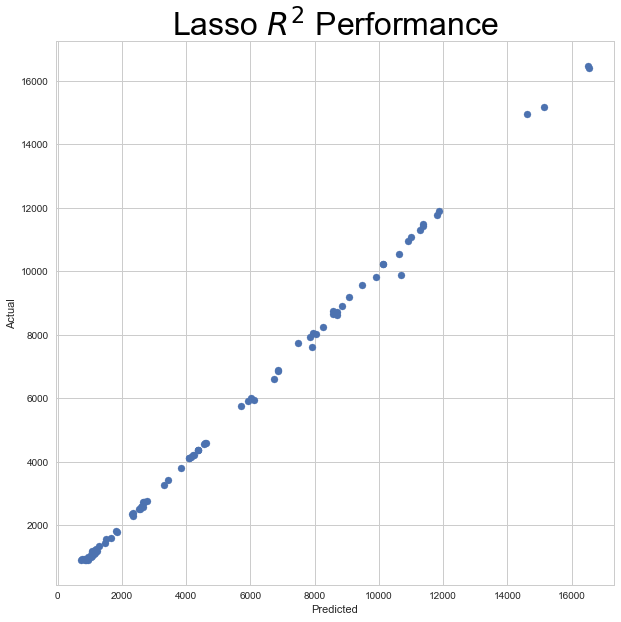

In [174]:
lasso_pred = fitted_models['lasso'].predict(A_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(lasso_pred, B_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Lasso $R^{2}$ Performance", fontsize=32, color="Black")
plt.show()

**Ridge scatter plot**

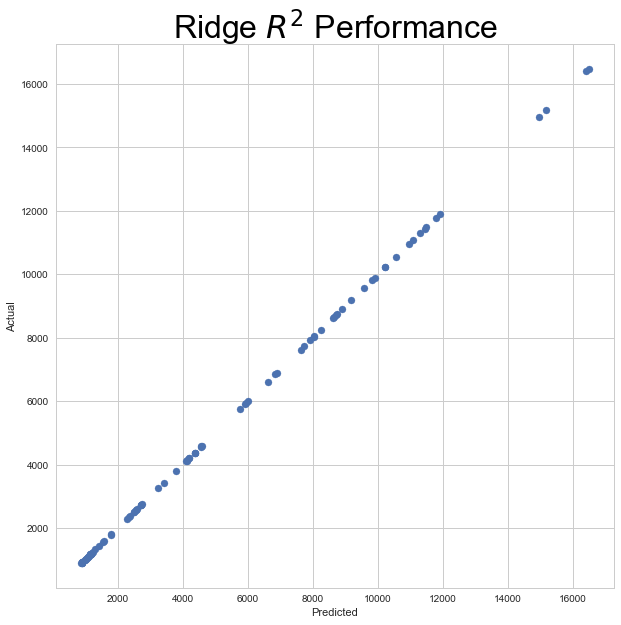

In [176]:
ridge_pred = fitted_models['ridge'].predict(A_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(ridge_pred, B_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Ridge $R^{2}$ Performance", fontsize=32, color="Black")
plt.show()

**Elastic Net scatter plot**

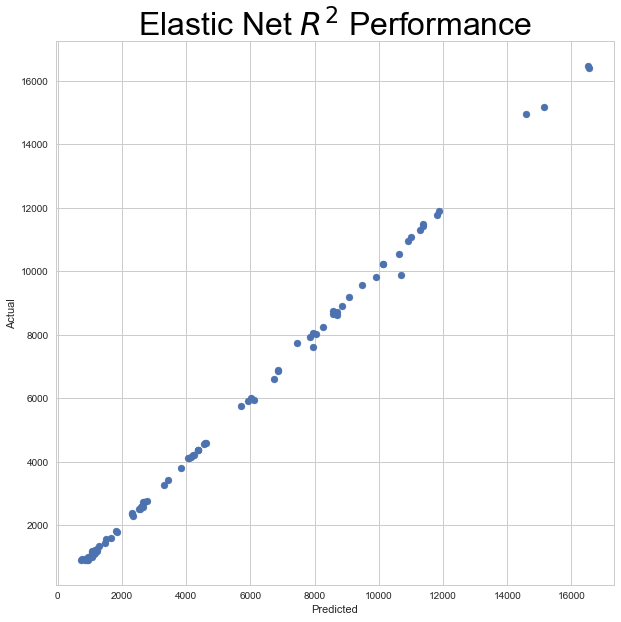

In [178]:
enet_pred = fitted_models['enet'].predict(A_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(enet_pred, B_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Elastic Net $R^{2}$ Performance", fontsize=32, color="Black")
plt.show()

**Random Forest scatter plot**

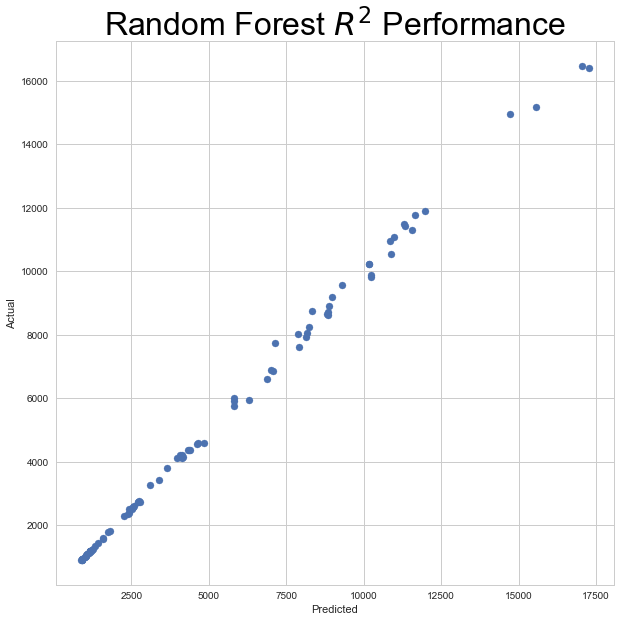

In [180]:
rf_pred = fitted_models['rf'].predict(A_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(rf_pred, B_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Random Forest $R^{2}$ Performance", fontsize=32, color="Black")
plt.show()

**Gradient Boosted scatter plot**

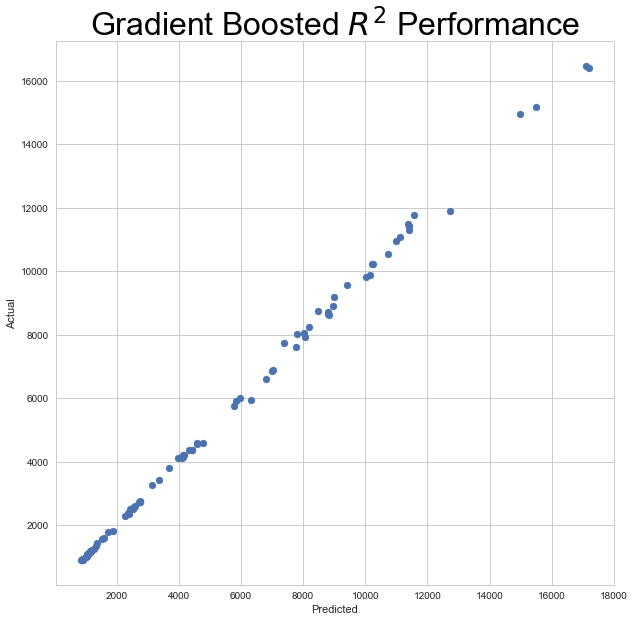

In [182]:
gb_pred = fitted_models['gb'].predict(A_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(gb_pred, B_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Gradient Boosted $R^{2}$ Performance", fontsize=32, color="Black")
plt.show()

**As expected, each of the graphs demonstrated a high correlation, with Ridge demonstrating the highest correlation.**

**Next, we'll view some future price predictions. Firstly, we'll create a Bitcoin currency dataframe.**

In [251]:
btc_cur = df[df['name'] == 'Bitcoin'].copy()
btc_cur.head()

,Unnamed: 0,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,hlc_average,ohlc_average
1344,67151,bitcoin,Bitcoin,2017-01-01,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38,986.703333,980.9425
1345,67150,bitcoin,Bitcoin,2017-01-02,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69,1016.613333,1012.1150
1346,67149,bitcoin,Bitcoin,2017-01-03,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48,1036.506667,1032.7800
1347,67148,bitcoin,Bitcoin,2017-01-04,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02,1119.516667,1100.7375
1348,67147,bitcoin,Bitcoin,2017-01-05,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68,1038.300000,1067.9075


**Let's create a prediction column with room for a 30 day forecast of the price. **

In [253]:
btc_cur['prediction'] = btc_cur['close'].shift(-30)

**Now we'll do some Data Cleaning and then create the train and test sets**

In [255]:
A = btc_cur.dropna().copy()
A['year'] = A['date'].apply(lambda x: x.year)
A['month'] = A['date'].apply(lambda x: x.month)
A['day'] = A['date'].apply(lambda x: x.day)
A = A.drop(['date', 'slug', 'name', 'ranknow', 'prediction'], axis=1)

B = btc_cur.dropna()['prediction']

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=100)

**Next, the parameters for the model are set up**

In [257]:
btc_predict = btc_cur[btc_cur['prediction'].isnull()]
btc_predict = btc_predict.drop('prediction', axis=1)

A_btc_predict = btc_predict.copy()
A_btc_predict['year'] = A_btc_predict['date'].apply(lambda x: x.year)
A_btc_predict['month'] = A_btc_predict['date'].apply(lambda x: x.month)
A_btc_predict['day'] = A_btc_predict['date'].apply(lambda x: x.day)
A_btc_predict = A_btc_predict.drop(['date', 'slug', 'name', 'ranknow'], axis=1)

In [258]:
btc_cur = btc_cur.drop('prediction', axis=1)

**Now, we'll plot the Price Prediction using the Lasso model **

In [268]:
model = fitted_models['lasso']
model.fit(A_train, B_train)
prediction = model.predict(A_btc_predict)

final = pd.concat([btc_cur, btc_predict])
final = final.groupby('date').sum()

day_one_forecast = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date = pd.date_range(day_one_forecast, periods=30, freq='D')
predictions = pd.DataFrame(prediction, columns=['prediction'], index=date)
final = final.append(predictions)
final.index.names = ['date']
final = final.reset_index()

final['prediction'] = final['prediction'] + (final['close'].iloc[-31] - final['prediction'].iloc[-1])

t0 = g_obj.Scatter(x=final['date'], y=final['close'],name='Price at Close')

t1 = g_obj.Scatter(x=final['date'], y=final['prediction'],name='Price Prediction')


data = [t0, t1]
layout = g_obj.Layout(title='Lasso Price Prediction',yaxis={'title': 'USD','nticks': 10,},)

fig = g_obj.Figure(data=data, layout=layout)
py.iplot(fig, filename='prediction-visualization')

C:\Users\Robot\Anaconda2\envs\Project\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



**Price Prediction using the Ridge model **

In [270]:
model = fitted_models['ridge']
model.fit(A_train, B_train)
prediction = model.predict(A_btc_predict)

final = pd.concat([btc_cur, btc_predict])
final = final.groupby('date').sum()

day_one_forecast = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date = pd.date_range(day_one_forecast, periods=30, freq='D')
predictions = pd.DataFrame(prediction, columns=['prediction'], index=date)
final = final.append(predictions)
final.index.names = ['date']
final = final.reset_index()

final['prediction'] = final['prediction'] + (final['close'].iloc[-31] - final['prediction'].iloc[-1])

t0 = g_obj.Scatter(x=final['date'], y=final['close'],name='Price at Close')

t1 = g_obj.Scatter(x=final['date'], y=final['prediction'],name='Price Prediction')


data = [t0, t1]
layout = g_obj.Layout(title='Ridge Price Prediction',yaxis={'title': 'USD','nticks': 10,},)

fig = g_obj.Figure(data=data, layout=layout)
py.iplot(fig, filename='prediction-visualization')

**Price Prediction using the Elastic Net model **

In [272]:
model = fitted_models['enet']
model.fit(A_train, B_train)
prediction = model.predict(A_btc_predict)

final = pd.concat([btc_cur, btc_predict])
final = final.groupby('date').sum()

day_one_forecast = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date = pd.date_range(day_one_forecast, periods=30, freq='D')
predictions = pd.DataFrame(prediction, columns=['prediction'], index=date)
final = final.append(predictions)
final.index.names = ['date']
final = final.reset_index()

final['prediction'] = final['prediction'] + (final['close'].iloc[-31] - final['prediction'].iloc[-1])

t0 = g_obj.Scatter(x=final['date'], y=final['close'],name='Price at Close')

t1 = g_obj.Scatter(x=final['date'], y=final['prediction'],name='Price Prediction')


data = [t0, t1]
layout = g_obj.Layout(title='Elastic Net Price Prediction',yaxis={'title': 'USD','nticks': 10,},)

fig = g_obj.Figure(data=data, layout=layout)
py.iplot(fig, filename='prediction-visualization')

C:\Users\Robot\Anaconda2\envs\Project\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



**Price Prediction using the Random Forest model **

In [274]:
model_rf = fitted_models['rf']
model_rf.fit(A_train, B_train)
prediction = model_rf.predict(A_btc_predict)

final_rf = pd.concat([btc_cur, btc_predict])
final_rf = final_rf.groupby('date').sum()

forecast_rf = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date = pd.date_range(forecast_rf, periods=30, freq='D')
predictions = pd.DataFrame(prediction, columns=['prediction'], index=date)
final_rf = final_rf.append(predictions)
final_rf.index.names = ['date']
final_rf = final_rf.reset_index()

final_rf['prediction'] = final_rf['prediction'] + (final_rf['close'].iloc[-31] - final_rf['prediction'].iloc[-1])

t0 = g_obj.Scatter(x=final_rf['date'], y=final_rf['close'],name='Price at Close')

t1 = g_obj.Scatter(x=final_rf['date'], y=final_rf['prediction'],name='Price Prediction')

data = [t0, t1]
layout = g_obj.Layout(title='Random Forest Prediction',yaxis={'title': 'USD','nticks': 10,},)
fig = g_obj.Figure(data=data, layout=layout)
py.iplot(fig, filename='random-forest-prediction')

**And finally, Price Prediction using the Gradient Boosted model **

In [276]:
model_rf = fitted_models['gb']
model_rf.fit(A_train, B_train)
prediction = model_rf.predict(A_btc_predict)

final_rf = pd.concat([btc_cur, btc_predict])
final_rf = final_rf.groupby('date').sum()

forecast_rf = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date = pd.date_range(forecast_rf, periods=30, freq='D')
predictions = pd.DataFrame(prediction, columns=['prediction'], index=date)
final_rf = final_rf.append(predictions)
final_rf.index.names = ['date']
final_rf = final_rf.reset_index()

final_rf['prediction'] = final_rf['prediction'] + (final_rf['close'].iloc[-31] - final_rf['prediction'].iloc[-1])

t0 = g_obj.Scatter(x=final_rf['date'], y=final_rf['close'],name='Price at Close')

t1 = g_obj.Scatter(x=final_rf['date'], y=final_rf['prediction'],name='Price Prediction')

data = [t0, t1]
layout = g_obj.Layout(title='Gradient Boosted Prediction',yaxis={'title': 'USD','nticks': 10,},)
fig = g_obj.Figure(data=data, layout=layout)
py.iplot(fig, filename='random-forest-prediction')

**The Price Predictions all look fairly similar. Let's combine the predictions to get a better look.**

In [288]:
model = fitted_models['lasso']
model.fit(A_train, B_train)
prediction = model.predict(A_btc_predict)

final = pd.concat([btc_cur, btc_predict])
final = final.groupby('date').sum()

day_one_forecast = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date = pd.date_range(day_one_forecast, periods=30, freq='D')
predictions = pd.DataFrame(prediction, columns=['prediction'], index=date)
final = final.append(predictions)
final.index.names = ['date']
final = final.reset_index()

final['prediction'] = final['prediction'] + (final['close'].iloc[-31] - final['prediction'].iloc[-1])


model1 = fitted_models['ridge']
model1.fit(A_train, B_train)
prediction1 = model1.predict(A_btc_predict)

final1 = pd.concat([btc_cur, btc_predict])
final1 = final1.groupby('date').sum()

day_one_forecast1 = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date1 = pd.date_range(day_one_forecast1, periods=30, freq='D')
predictions1 = pd.DataFrame(prediction1, columns=['prediction'], index=date1)
final1 = final1.append(predictions1)
final1.index.names = ['date']
final1 = final1.reset_index()

final1['prediction'] = final1['prediction'] + (final1['close'].iloc[-31] - final1['prediction'].iloc[-1])

model2 = fitted_models['enet']
model2.fit(A_train, B_train)
prediction2 = model2.predict(A_btc_predict)

final2 = pd.concat([btc_cur, btc_predict])
final2 = final2.groupby('date').sum()

day_one_forecast2 = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date2 = pd.date_range(day_one_forecast2, periods=30, freq='D')
predictions2 = pd.DataFrame(prediction2, columns=['prediction'], index=date2)
final2 = final2.append(predictions2)
final2.index.names = ['date']
final2 = final2.reset_index()

final2['prediction'] = final2['prediction'] + (final2['close'].iloc[-31] - final2['prediction'].iloc[-1])

model3 = fitted_models['rf']
model3.fit(A_train, B_train)
prediction3 = model3.predict(A_btc_predict)

final3 = pd.concat([btc_cur, btc_predict])
final3 = final3.groupby('date').sum()

day_one_forecast3 = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date3 = pd.date_range(day_one_forecast3, periods=30, freq='D')
predictions3 = pd.DataFrame(prediction3, columns=['prediction'], index=date3)
final3 = final3.append(predictions3)
final3.index.names = ['date']
final3 = final3.reset_index()

final3['prediction'] = final3['prediction'] + (final3['close'].iloc[-31] - final3['prediction'].iloc[-1])

model4 = fitted_models['gb']
model4.fit(A_train, B_train)
prediction4 = model4.predict(A_btc_predict)

final4 = pd.concat([btc_cur, btc_predict])
final4 = final4.groupby('date').sum()

day_one_forecast4 = btc_cur.iloc[-1].date + dt.timedelta(days=1)
date4 = pd.date_range(day_one_forecast4, periods=30, freq='D')
predictions4 = pd.DataFrame(prediction4, columns=['prediction'], index=date4)
final4 = final4.append(predictions4)
final4.index.names = ['date']
final4 = final4.reset_index()

final4['prediction'] = final4['prediction'] + (final4['close'].iloc[-31] - final4['prediction'].iloc[-1])

t0 = g_obj.Scatter(x=final['date'], y=final['close'],name='Price at Close')

t1 = g_obj.Scatter(x=final['date'], y=final['prediction'],name='Lasso Prediction')

t2 = g_obj.Scatter(x=final1['date'], y=final1['prediction'],name='Ridge Prediction')

t3 = g_obj.Scatter(x=final2['date'], y=final2['prediction'],name='Elastic Net Prediction')

t4 = g_obj.Scatter(x=final3['date'], y=final3['prediction'],name='Random Forest Prediction')

t5 = g_obj.Scatter(x=final4['date'], y=final4['prediction'],name='Gradient Boosted Prediction')

data = [t0, t1, t2, t3, t4, t5]
layout = g_obj.Layout(title='Combined Model Price Predictions', yaxis={'title': 'USD', 'nticks': 10,},)

fig = g_obj.Figure(data=data, layout=layout)
py.iplot(fig, filename='prediction-visualization')

C:\Users\Robot\Anaconda2\envs\Project\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\Users\Robot\Anaconda2\envs\Project\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



**That's better. Now let's take a closer look**

![8BZK4m.png](https://i.lensdump.com/i/8BZK4m.png)

**As we can see from the graph above, the Lasso and Elastic Net prediction practically overlap (there are slight differences in their values). Their MAE and MSE values were very similar. They also had convergence issues during plotting. Their hyperparameters may need further tuning.**   

**Regardless, all the models produced believable predictions. There are no huge upticks or downticks but there are noticeable differences amonst some of them. For instance, On April 29th, the Random Forest Price Prediction is approximately \$15,300. The Ridge Prediction however, is approximately \$12,700. That's a substantial difference at \$2,600. Revisiting this notebook as the days pass will allow users to see how each prediction has stacked up against the Actual Price.** 

**Of course, the cryptocurrency market is incredibly volatile. Some of the market's largest swings have been caused by rumoured governmental regulatory action, media attention, and professional day trader manipulation. Though difficult to implement, accounting for these in any model would help increase its accuracy significantly.**

**This concludes my analysis of the Cryptocurrency Market.**